In [1]:
import numpy as np
import glob
import cv2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sys
sys.executable

'/home/ing/miniconda3/envs/milk/bin/python'

In [27]:
## Generate coordinates around a circle
coords = np.random.uniform(low=-750, high=750, size=(500, 2)).astype(np.int)


In [36]:
imgs = glob.glob('../dataset/tile_images/*.jpg')
xout = np.zeros((2000,2000,3), dtype=np.uint8)+255
imgs = [cv2.imread(x) for x in imgs]

In [37]:
r = 700
circle_coords = []
zs = []
for c in coords:
    d = np.sqrt(np.sum(np.square(c)))
    if d < r:
        circle_coords.append(c+1000)
        z = d / r
        print(d, z)
        zs.append(z * 2)

print(len(circle_coords))
print(len(zs))

563.0008880987667 0.8042869829982382
525.9781364277417 0.7513973377539167
599.4205535348283 0.8563150764783262
499.8079631218374 0.7140113758883392
666.0285279175359 0.9514693255964799
503.6447160449517 0.7194924514927881
689.9927535851373 0.9857039336930532
667.4226546949092 0.9534609352784417
494.2924235713107 0.706132033673301
332.18217893198306 0.47454596990283293
333.79334924470857 0.4768476417781551
361.7319449537185 0.516759921362455
644.8968909833571 0.9212812728333674
336.2038072360276 0.48029115319432514
516.5597738887534 0.7379425341267906
295.93580384941595 0.4227654340705942
126.62148316932637 0.18088783309903766
334.0 0.47714285714285715
323.1671394185987 0.46166734202656956
492.16359068911225 0.7030908438415889
109.87720418721983 0.1569674345531712
687.8757155184358 0.9826795935977654
428.02920461108727 0.6114702923015533
619.7491427989231 0.8853559182841759
477.33950182234025 0.6819135740319147
614.2719267555697 0.8775313239365281
497.84535751576516 0.7112076535939502
3

In [38]:
idx = 0
for c,z in zip(circle_coords, zs):
    dsize = int(64 * z)
#     dsize=32
    if dsize == 0:
        continue
    img_ = cv2.resize(imgs[idx], dsize=(dsize, dsize))
    img_ = np.pad(img_, ((3,3), (3,3), (0,0)), 'constant')

    bbox = [c[0], c[0]+dsize+6, c[1], c[1]+dsize+6]
    xout[bbox[0]:bbox[1], bbox[2]:bbox[3], :] = img_[:,:,::-1]
    idx += 1

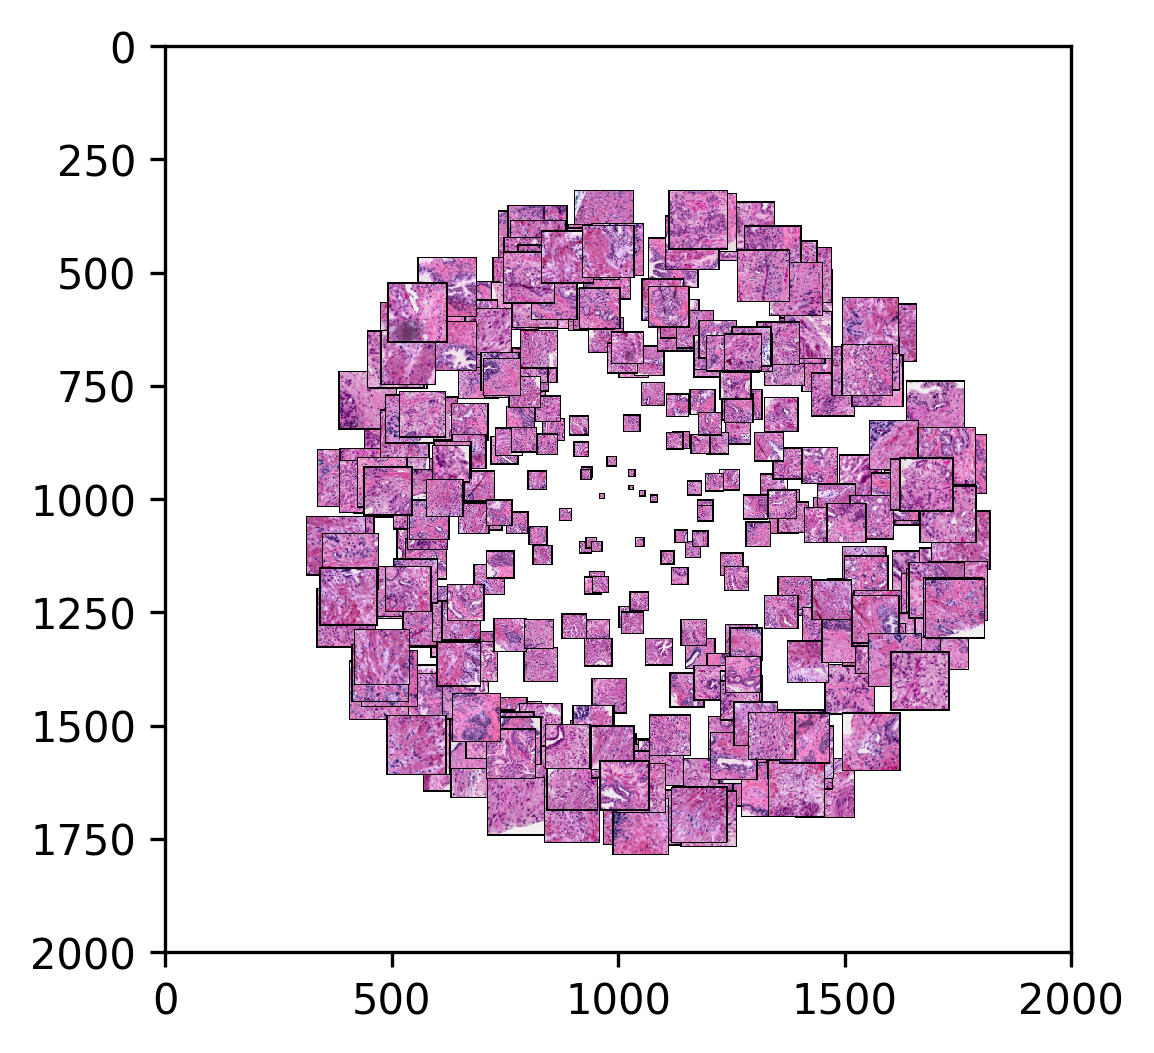

In [39]:
plt.figure(figsize=(4,4), dpi=300)
plt.imshow(xout)

In [40]:
cv2.imwrite('tile_cloud.png', xout[:,:,::-1])

True